In [ ]:
# Introduction : comprendre le dataset avec les statistiques descriptives

**Pourquoi faire de l'analyse descriptive ?**

Objectif = transformer les observations brutes en informations <br/>
=> Les statistiques sont une collection d'outils que vous pouvez utiliser pour résumer et organiser votre ensemble de données afin qu'il puisse être facilement compris (aide à la prise de décision)

**Statistiques descriptives vs statistiques inférentielles**

- Statistiques descriptives = description et interprétation des données (sans tenter de faire des inférences ; extrapoler les résultats de l'échantillon à l'ensemble de la population)
- Statistiques inférentielles = décisions et prédictions basées sur la probabilité

**Réferences**
- https://towardsdatascience.com/intro-to-descriptive-statistics-252e9c464ac9
- https://medium.com/@himanshuxd/the-guide-to-rigorous-descriptive-statistics-for-machine-learning-and-data-science-9209f88e4363

## Vocabulaire

##### Définitions des termes courants de machine learning :
https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html

Les principaux à retenir pour le moment :

- Observation / individu = point de données ou ligne dans un jeu de données
- Attribut / attribut = qualité décrivant une observation (par exemple couleur, taille, poids) (en-têtes de colonnes)
- Feature / variable = un attribut + sa valeur (la couleur est un attribut, la "couleur bleue" est une caractéristique)
- Dimension / taille = nombre d'entités dans le jeu de données

## Types de données / Data types

Types de données les plus courantes :
- variables quantitatives : discrètes ou continues
=> Les données quantitatives sont dénombrables ou mesurables, relatives aux nombres.
- variables qualitatives : ordonnées ou non
=> Les données qualitatives sont descriptives, relatives à la langue.

https://towardsdatascience.com/data-types-in-statistics-347e152e8bee<br/>
https://careerfoundry.com/en/blog/data-analytics/difference-between-quantitative-and-qualitative-data/

## Index avec Pandas

Vous allez avoir besoin de manipuler les index de Pandas par la suite ! <br/>


https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html<br/>
https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

Quelques petits tips :<br/>
- Série: s.loc[indexer]; s[index_label]
- DataFrame: df.loc[row_indexer,column_indexer]; df[colname]
- You may access an index on a Series or column on a DataFrame directly as an attribute (df.A)
- slicing: s[:5], s[:-1], df.loc['20130102':'20130104'], df1.loc['d':, 'A':'C']

# Statistiques univariées

Statistiques univariées : lorsqu'on analyse une seule variable à la fois

Lorsque vous décrouvrez un nouveau jeu de données, différentes étapes sont à réaliser dans un premier temps afin de se faire une idée des données :
- importer vos données dans un dataframe<br/>
(par exemple : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- regarder les premières lignes de votre dataframe afin d'avoir une idée de ce à quoi ressemble les données<br/> (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)<br/>
=> à cette étape là n'oubliez pas de prendre le temps de comprendre chacune des variables ; ce qu'elle signifie, c'est important par la suite de savoir de quoi on parle !
- regarder les informations de votre dataframe<br/>
(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html)
- regarder les statistiques descriptives univariées de votre dataframe<br/>
(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)
- réaliser des graphiques univariés afin d'observer la répartition des données<br/>
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html<br/>
    - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html<br/>
    
Nous allons explorer tout ça petit à petit !

Par la suite si vous vous demandez quel graphique est le plus adapté à vos données, vous pouvez jeter un coup d'oeil ici : https://www.data-to-viz.com/

## Premières observations : se familiariser avec le jeu de données

**TODO**
        
1. Charger le dataset "DATA_part1" dans un dataframe
2. Afficher les premières lignes, tester la méthode 'describe'
3. Tracer un histogramme des 8 premières colonnes

**Aide :**

- Histogramme = représentation graphique de la répartition d'une variable : on groupe les valeurs par classe et on affiche le nb de valeurs par classe. Faire varier le nombre de classe et observer le résultat

#### Charger le dataset "DATA_part1" dans un dataframe

In [10]:
import pandas as pd
df = pd.read_csv('Data_part1')

In [11]:
df

,A,B,C,D,E,F,G,H,réveil,matin,lait,petit dej
0,-4.853218,0.336325,-2.252479,3.145284,3.212247,0.540656,0.737929,-0.542533,toujours pas réveillé,café,0.0,croissant
1,1.031640,-1.207136,-0.704018,3.092987,4.924741,0.153680,0.313898,-1.639022,difficile,café,1.0,croissant
2,-4.582366,-0.800292,-0.515243,2.925474,2.808811,1.412834,1.302301,-0.054520,toujours pas réveillé,café,1.0,croissant
3,2.691380,0.144119,2.530201,3.914499,4.108476,3.495376,3.381862,1.136969,difficile,thé,0.0,croissant
4,3.679196,0.955008,-5.120556,2.631311,4.832076,0.389124,0.383447,-5.500964,difficile,café,0.0,croissant
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.194839,-0.233589,-0.621681,-2.818316,6.717857,0.595529,0.451535,0.410630,facile,café,1.0,pain au choc
9996,3.316081,-0.378908,-2.200668,-1.822745,0.325716,1.501956,1.556693,-3.517332,difficile,café,1.0,pain au choc
9997,1.233816,-0.085799,-5.785903,-0.391353,8.584206,1.633655,1.736241,-5.066254,difficile,café,1.0,chocolatine
9998,1.897711,-0.208661,-5.381268,0.279454,10.493380,0.485266,0.600564,-6.283780,difficile,café,1.0,chocolatine


#### Afficher les premières lignes, tester la méthode 'describe'

In [12]:
df.head()

,A,B,C,D,E,F,G,H,réveil,matin,lait,petit dej
0,-4.853218,0.336325,-2.252479,3.145284,3.212247,0.540656,0.737929,-0.542533,toujours pas réveillé,café,0.0,croissant
1,1.031640,-1.207136,-0.704018,3.092987,4.924741,0.153680,0.313898,-1.639022,difficile,café,1.0,croissant
2,-4.582366,-0.800292,-0.515243,2.925474,2.808811,1.412834,1.302301,-0.054520,toujours pas réveillé,café,1.0,croissant
3,2.691380,0.144119,2.530201,3.914499,4.108476,3.495376,3.381862,1.136969,difficile,thé,0.0,croissant
4,3.679196,0.955008,-5.120556,2.631311,4.832076,0.389124,0.383447,-5.500964,difficile,café,0.0,croissant


In [13]:
df.tail()

,A,B,C,D,E,F,G,H,réveil,matin,lait,petit dej
9995,-1.194839,-0.233589,-0.621681,-2.818316,6.717857,0.595529,0.451535,0.410630,facile,café,1.0,pain au choc
9996,3.316081,-0.378908,-2.200668,-1.822745,0.325716,1.501956,1.556693,-3.517332,difficile,café,1.0,pain au choc
9997,1.233816,-0.085799,-5.785903,-0.391353,8.584206,1.633655,1.736241,-5.066254,difficile,café,1.0,chocolatine
9998,1.897711,-0.208661,-5.381268,0.279454,10.493380,0.485266,0.600564,-6.283780,difficile,café,1.0,chocolatine
9999,2.055711,-2.846464,0.690904,-2.761351,5.504073,1.298243,1.505902,2.265215,difficile,café,1.0,pain au choc


In [14]:
df.describe()

,A,B,C,D,E,F,G,H,lait
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.036334,-0.001222,0.027083,0.002676,4.687889,1.023130,1.027027,0.065347,0.498900
std,2.866900,1.007486,3.008689,2.241933,2.966784,1.029788,1.036689,3.328620,0.500024
min,-4.999033,-4.266466,-11.079926,-5.315736,0.000386,0.000026,-0.297518,-11.974507,0.000000
25%,-2.412769,-0.690013,-1.990707,-1.984108,2.884097,0.285050,0.298594,-2.104974,0.000000
50%,0.019228,0.003851,-0.001765,0.029963,4.168992,0.712555,0.722780,0.004217,0.000000
75%,2.516380,0.686570,2.063967,2.018438,5.703988,1.411114,1.423560,2.193579,1.000000
max,4.999584,3.834648,10.856120,5.915217,20.776221,11.239160,11.309762,29.876586,1.000000


#### Tracer un histogramme des 8 premières colonnes

In [15]:
df1 = df.iloc[:,0:8]

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'C'}>],
       [<AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'H'}>, <AxesSubplot:>]], dtype=object)

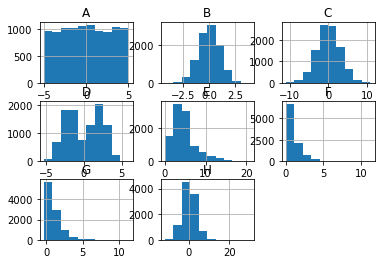

In [16]:
df1.hist()

## Mesures de tendance centrale

Nous allons maintenant creuser les notions de :
- moyenne
- médiane
- mode

https://towardsdatascience.com/statistics-01-mean-median-and-mode-d6d8597ed9f1

In [17]:
from IPython.core.display import HTML 
from IPython.display import Image
url = 'https://miro.medium.com/max/750/1*HO8STTKaPuDHcYCu7TgDNg.png'
Image(url = url, width = 500)

**TODO**
        
1. Afficher la moyenne et la médiane de chaque colonne
2. Pourquoi utiliser l'une plutôt que l'autre ?
3. Quelle est la mesure la plus représentative d'un dataset contenant des données qualitatives ?

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf<br/>
https://towardsdatascience.com/mean-median-mode-which-central-tendency-measure-to-use-when-9fb3ebbe3006

#### Afficher la moyenne et la médiane de chaque colonne

In [18]:
df1.mean()

A    0.036334
B   -0.001222
C    0.027083
D    0.002676
E    4.687889
F    1.023130
G    1.027027
H    0.065347
dtype: float64

In [19]:
df1.median()

A    0.019228
B    0.003851
C   -0.001765
D    0.029963
E    4.168992
F    0.712555
G    0.722780
H    0.004217
dtype: float64

#### Pourquoi utiliser l'une plutôt que l'autre ?

La moyenne est simplement considérée comme la mesure la plus fiable de la tendance centrale pour faire des hypothèses sur une population à partir d'un échantillon unique.

Le principal avantage de la médiane sur la moyenne est qu'elle n'est pas affectée par la présence de valeurs extrêmement grandes ou extrêmement petites (valeurs aberrantes) qui peuvent fausser la moyenne. La médiane reflète mieux une valeur « typique » de l'ensemble.

- la médiane est souvent utilisée avec des distributions asymétriques (distributions que la moyenne représente mal)
- la moyenne est plus affectée que la médiane par les outliers

#### Quelle est la mesure la plus représentative d'un dataset contenant des données qualitatives ?

Le mode : la modalité la plus fréquente dans le dataset

In [20]:
df.iloc[:,8:].mode()

,réveil,matin,lait,petit dej
0,difficile,café,0.0,pain au choc


## Mesures de dispersion

Les mesures de variabilité les plus populaires sont l'intervalle (range), l'intervalle interquartile (interquartile range, IQR), la variance et l'écart type (standard deviation). Ceux-ci sont utilisés pour mesurer la propagation ou la variabilité au sein de vos données.

1. Intervalle et intervalle interquartile

     - la plage mesure où se trouvent le début et la fin de votre point de données (maximum - minimum)
     - l'écart interquartile est une mesure de l'endroit où se situent la majorité des valeurs
    

2. Variance et écart type

     - La variance est calculée en trouvant la différence entre chaque point de données et la moyenne, en les mettant au carré, en les additionnant, puis en prenant la moyenne de ces nombres.
     - Les carrés sont utilisés pour pondérer plus lourdement les valeurs aberrantes et empêcher que les différences au-dessus de la moyenne neutralisent celles en dessous de la moyenne.
     - En raison de la mise au carré, ce n'est pas dans la même unité de mesure que les données d'origine
     - Écart-type = racine carrée de la variance

### Quelques illustrations pour comprendre ces notions

#### Ecart-type

Source : https://fr.wikipedia.org/wiki/%C3%89cart_type

In [21]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Comparison_standard_deviations.svg/500px-Comparison_standard_deviations.svg.png'
Image(url = url, width=400)

Exemple de deux échantillons ayant la même moyenne mais des écarts types différents illustrant l'écart type comme mesure de la dispersion autour de la moyenne.

In [22]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/500px-Standard_deviation_diagram.svg.png'
Image(url = url, width=400)

Courbe de distribution normale montrant l'écart type. Chaque bande verticale a une largeur d'un écart type et les pourcentages indiquent leur valeur approximative rapportée à la population totale. Note : du fait des arrondis, le total est de 99,8 % au lieu de 100%.

#### Ecart interquartile / boxplot

Source : https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [23]:
url = 'https://miro.medium.com/max/1000/1*gV5r1dUfmaPxoSMsL7h5rA.png'
Image(url = url, width=400)

In [24]:
url = 'https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png'
Image(url = url, width=600)

### Mise en pratique

**TODO**
        
Pour les 8 premières colonnes:
1. Afficher l'étendue (max-min) et l'écart interquartile
2. Afficher l'écart type de chaque colonne
3. Tracer une boîte à moustache pour chaque colonne (boxplot). Quelles distributions semblent similaires ?
4. Comparer ces boxplots avec les histogrammes obtenus plus haut

**Notes:**
- boxplot : les whist du boxplot vont par défaut jusqu'à 1.5xIQR (jusqu'à la première données en dessous en fait), le reste apparait en 'outliers'
- on peut changer cette valeur, on peut aussi mettre deux éléments (deux percentiles)
https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

#### Afficher l'étendue (max-min) et l'écart interquartile

In [25]:
df1.max() - df1.min()

A     9.998616
B     8.101113
C    21.936046
D    11.230953
E    20.775834
F    11.239134
G    11.607280
H    41.851093
dtype: float64

In [26]:
df1.quantile(0.75) - df1.quantile(0.25)

A    4.929149
B    1.376583
C    4.054675
D    4.002547
E    2.819892
F    1.126065
G    1.124966
H    4.298553
dtype: float64

Exemples de ce qu'on peut voir ici :
- La variable H a une plage de valeurs plus grande par rapport à A ou B (max - min)
- Les données sont plus regroupées ; centrées autour de la médiane pour les variables B, F et G (IQR plus petit)

#### Afficher l'écart type de chaque colonne

In [27]:
df1.std()

A    2.866900
B    1.007486
C    3.008689
D    2.241933
E    2.966784
F    1.029788
G    1.036689
H    3.328620
dtype: float64

Exemples de ce qu'on peut voir ici :
- Les variables C et H montrent un écart-type plus élevé : une plus grande dispersion des données sur la plage de valeurs

#### Tracer une boîte à moustache pour chaque colonne (boxplot). Quelles distributions semblent similaires ?

<AxesSubplot:>

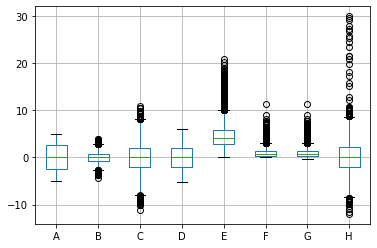

In [28]:
df1.boxplot()

Exemples de ce qu'on peut voir ici :
- La variable H a une plage de valeurs plus grande par rapport à A ou B (étendue de la boite à moustache)
- Les données sont plus regroupées ; centrées autour de la médiane pour les variables B, F et G (petites boites comparées aux autres)

Ce qui correspond bien à ce qu'on a vu plus haut

#### Comparer ces boxplots avec les histogrammes obtenus plus haut

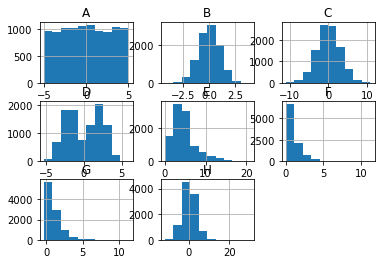

In [29]:
df1.hist();

Exemples de ce qu'on peut voir ici :
- La variable A présente de manière presque équivalente toutes les valeurs
- Les variables B et C semblent être bien centrées : regroupées autour de la moyenne, de la médiane et du mode
- La variable D présente deux bosses : cela peut laisser penser qu'il y a deux groupes d'individus avec des comportements différents sur cette variable
- Les variables F et G tendent vers la gauche (on parlera de skew par la suite)

## Normalisation / standardisation

- Normalization / Normalisation = redimensionne les valeurs dans une plage de [0,1] (aire sous la courbe = 1 par contre pas forcément centrée sur 0)
- Standardization / Standardisation = redimensionne les données pour avoir une moyenne de 0 et un écart type de 1 (variance unitaire), en faisant x - mean / std
- Standard score / Score standard (z-score) = représente le nombre d'écarts types au-dessus ou en dessous de la moyenne qu'une observation spécifique tombe

Comprendre :<br/>
https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html<br/>
https://towardsdatascience.com/normalization-vs-standardization-cb8fe15082eb<br/>

Mettre en pratique :<br/>
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02<br/>

Pour aller plus loin :<br/>
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

Pourquoi c'est important ? <br/>

Vous avez peut-être constaté dans les questions précédentes qu'il est difficile de comparer les variables entre elles : elles ne sont pas sur les mêmes plages de valeurs, ce serait un peu comme comparer des choux et des carottes !

Pourquoi est-ce qu'on normalise ou standardise nos données avant de les analyser ? <br/>

- Pour nous aider à comparer les fonctionnalités qui ont des unités ou des échelles différentes
- Pour faciliter l'interprétation des coefficients de régression (=> sera vu dans la 3ème partie stat)
- Pour aider à la convergence dans l'algorithme ML (problèmes de mise à l'échelle) (=> sera vu dans la partie Machine Learning)

**TODO**
        
Pour les 8 premières colonnes:
1. Standardiser et normaliser le dataframe (par colonne)
2. Identifier les outliers (typiquement > 3 std)
3. Tracer les histogrammes obtenus sans outliers

#### Standardisation

In [30]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_X = sc_X.fit_transform(df)
# #Convert to table format - StandardScaler 
# sc_X = pd.DataFrame(data=sc_X, columns=["Age", "Salary","Purchased","Country_France","Country_Germany", "Country_spain"])
# sc_X

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import sklearn

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)
scaled_features = scaler.transform(df1)
#Convert to table format - MinMaxScaler
#df_MinMax = pd.DataFrame(data=scaled_features, columns=["A", "B", "C", "D", "E", "F"])

NameError: name 'df1' is not defined

#### Détections outliers

https://docs.python.org/fr/3/library/functions.html#any

Récupérer les valeurs aberrantes de la ligne :

Récupérer les colonnes de valeurs aberrantes (s'il n'y en a qu'une par ligne) :

https://stackoverflow.com/questions/8305199/the-tilde-operator-in-python

## Mesures de forme / Measures of shape

Skewness et Kurtosis : 
https://towardsdatascience.com/intro-to-descriptive-statistics-252e9c464ac9

* Skewness : symétrie de la distribution
* Kurtosis : aplatissement

Observez ces mesures de forme sur vos données

**Aide**
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

#### Skew

Exemples de ce qu'on peut voir ici :
- Les variables A, B, C et H ont un skew proche de 0, elles sont symétriques, on peut le vérifier en regardant les histogrammes
- E, F, G et H ont un skew positif plus élevé : la distribution tend vers la gauche ; vers les plus petites valeurs

#### Kurtosis

L'aplatissement mesure si votre ensemble de données est à queue lourde ou à queue légère par rapport à une distribution normale <br/>

Exemples de ce qu'on peut voir ici :
- F, G et H sont effectivement plus applaties que les autres

# Statistiques multivariées

On va maintenant observer les données en croisant les variables entre elles !

## Correlations

https://en.wikipedia.org/wiki/Correlation

Quelques notions pour commencer :
- Covariance = quantification de la variation d'une variable par rapport à une autre (elle caractérise les variations simultanées des deux variables) 
- Correlation = covariance normalisée
- coefficient de corrélation linéaire entre 2 variables = quotient de leur covariance par le produit de leurs écarts types
- La valeur absolue du coefficient de correlation, toujours comprise entre 0 et 1, ne mesure pas l’intensité de la liaison mais la prépondérance de la relation affine sur les variations internes des variables. 
- Un coefficient nul n’implique pas indépendance, car d’autres types de corrélation sont possibles.
- Le fait que deux variables soient « fortement corrélées » ne démontre pas qu'il y ait une relation de causalité entre l'une et l'autre. Le contre-exemple le plus typique est celui où elles sont en fait liées par une causalité commune. 

**En bref :**
- Corrélation ne signifie pas causalité
- La corrélation (de Pearson) ne mesure que la tendance linéaire

In [5]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1000px-Correlation_examples2.svg.png'
Image(url = url, width=500)

NameError: name 'Image' is not defined

Plusieurs ensembles de points (x, y), avec le coefficient de corrélation de Pearson de x et y pour chaque ensemble. La corrélation reflète le bruit et la direction d'une relation linéaire (rangée du haut), mais pas la pente de cette relation (au milieu), ni de nombreux aspects des relations non linéaires (en bas). N.B. : le chiffre du centre a une pente de 0 mais dans ce cas le coefficient de corrélation est indéfini car la variance de Y est nulle.

In [6]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1000px-Anscombe%27s_quartet_3.svg.png'
Image(url = url, width=500)

NameError: name 'Image' is not defined

Quatre ensembles de données avec la même corrélation de 0,816

**TODO**

1. Calculer les corrélations entre les colonnes 2 à 2 : afficher le résultat sur une 'heatmap'
3. A votre avis: comment la correlation va-t-elle être impactée par la standardisation ? Vérifiez sur le dataset.
4. Si deux variables sont fortement correlées, toute nouvelle feature correlée à l'une sera-t-elle forcément correlée à l'autre ?

**Aide:**  
- la librairie 'seaborn' permet de créer très facilement de belles 'heatmap' : https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Corrélations entre les colonnes 2 à 2 / Afficher le résultat sur une 'heatmap'

In [ ]:
import seaborn as sns


Exemples de ce qu'on peut voir ici :
- C et H sont très corrélées positivement, donc liées entre elles
=> C'est à dire que quand l'une va grandir, l'autre va grandir aussi
- F et G également
- => à l'inverse si on avait eu des corrélations négatives (en bleu foncé), plus l'une des variables grandit, plus l'autre diminue

#### A votre avis: comment la correlation va-t-elle être impactée par la standardisation ? Vérifiez sur le dataset.

Non : à montrer

#### Si deux variables sont fortement correlées, toute nouvelle feature correlée à l'une sera-t-elle forcément correlée à l'autre ?

Oui : pourquoi ?

Y corrélé à X ~ Y = alpha x X + espilon (avec espilon proche de zero)<br/>
Z corrélé à X ~ Z = beta x X + nu (avec nu proche de zero)<br/>
et donc :<br/>
Y = (alpha/beta)Z - ((alpha/beta)*nu+espilon)<br/>

## With qualitatives data

Vpus pourrez constater que les variables qualitatives n'étant pas numériques, il est plus délicat de les analyser : on ne peut pas observer la moyenne, la médiane, voir s'il y a des corrélations,... <br/>
Afin de faciliter leur analyse, leur intégration dans nos modèles par la suite, il est possible de les transformer en variables quantitatives :
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html

**TODO**

1. Tester le module describe sur les données qualitative
2. Tranformer les variables qualitatives
3. Chercher les dépendances entre les colonnes qualitatives et les autres colonnes

**Aide :**
    
- pour fixer le type d'une variable, vous pouvez utiliser la méthode .astype()
- pour grouper selon la variable qualitative étudiée, vous pouvez utiliser 'groupby'

Transforming qualitative variables in quantitative variables with the methods map or get_dummies.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
* https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html